This notebook tests a small set of experiments. It investigates the circuits from QVOL 5 qubits 
with depth from 1 to 10.

The goal is to have the lookahead outperform the rest of the pass managers. 

In [1]:
from qiskit.transpiler.passes.routing.sabre_swap_v020_lookahead_new import SabreSwap as SabreSwap_v020
from qiskit.transpiler.passes.layout.sabre_layout_v020 import SabreLayout as SabreLayout_v020
from ulti.circuits import get_circuit_list, sort_circuits_by_depth
from ulti.coupling_maps import file_to_coupling_map
from ulti.pass_managers import build_pm
import time

Setting up circuits and transpiler passes

In [2]:
qc_name = "size5_depth_1-10"
cp_name = "hex_7"
cm = file_to_coupling_map(f'coupling_maps/{cp_name}.txt')
seed = 42

fast_layout = True
# pass manager for Sabre v0.20

rp_v020 = SabreSwap_v020
lp_v020 = SabreLayout_v020
pm_v020 = build_pm(rp_v020, lp_v020, cm, seed=seed, fast_layout=fast_layout)

qc_list = get_circuit_list([f'circuits/{qc_name}/'])
qc_list = sort_circuits_by_depth(qc_list)
# set qc_list to the the last circuit
qc_list = qc_list[-1:]

In [3]:
# confirm the circuit depth is expected
for i, qc in enumerate(qc_list):
    print(f"Depth of the circuit {i+1}:", qc.decompose().depth())

Depth of the circuit 1: 9


In [4]:
# draw each of the circuits
for i, qc in enumerate(qc_list):
    print(f"Circuit {i+1}:\n")
    print(qc.decompose().draw(output='text'))
    print("\n")
    print("-"*100)

Circuit 1:

     ┌────────────┐              ┌────────────┐┌────────────┐┌────────────┐»
q_0: ┤1           ├──────────────┤0           ├┤1           ├┤1           ├»
     │            │              │            ││  Unitary_4 ││  Unitary_6 │»
q_1: ┤            ├──────────────┤            ├┤0           ├┤0           ├»
     │  Unitary_0 │┌────────────┐│  Unitary_2 │├────────────┤└────────────┘»
q_2: ┤            ├┤0           ├┤            ├┤1           ├──────────────»
     │            ││            ││            ││            │┌────────────┐»
q_3: ┤0           ├┤  Unitary_1 ├┤1           ├┤  Unitary_3 ├┤0           ├»
     └────────────┘│            │└────────────┘│            ││  Unitary_5 │»
q_4: ──────────────┤1           ├──────────────┤0           ├┤1           ├»
                   └────────────┘              └────────────┘└────────────┘»
«     ┌────────────┐              ┌─────────────┐                              »
«q_0: ┤1           ├──────────────┤0            ├───────────

In [5]:
depths_20 = []

# Loop through the circuits and run them through the pass managers
for i, qc in enumerate(qc_list):
    qc = qc.decompose()

    # Transpile using v0.20
    start_20 = time.time()
    qc_tr_20 = pm_v020.run(qc)
    end_20 = time.time()
    duration_20 = end_20 - start_20
    depth_20 = qc_tr_20.decompose(["swap"]).depth()
    depths_20.append(depth_20)

    # Print the depth and duration for each transpilation
    print(f"{'Depth after transpiled v0.20:':<60}{depth_20:<10}{'Time taken:':<20}{duration_20:.5f} seconds")

    print("-"*100)

# Print the average depth and duration for each transpilation
print(f"{'Average depth after transpiled v0.20:':<60}{sum(depths_20)/len(depths_20):<10.5f}")

Final depth:  24
Depth after transpiled v0.20:                               24        Time taken:         0.02351 seconds
----------------------------------------------------------------------------------------------------
Average depth after transpiled v0.20:                       24.00000  


/Users/henryzou/Documents/GitHub/qiskit/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


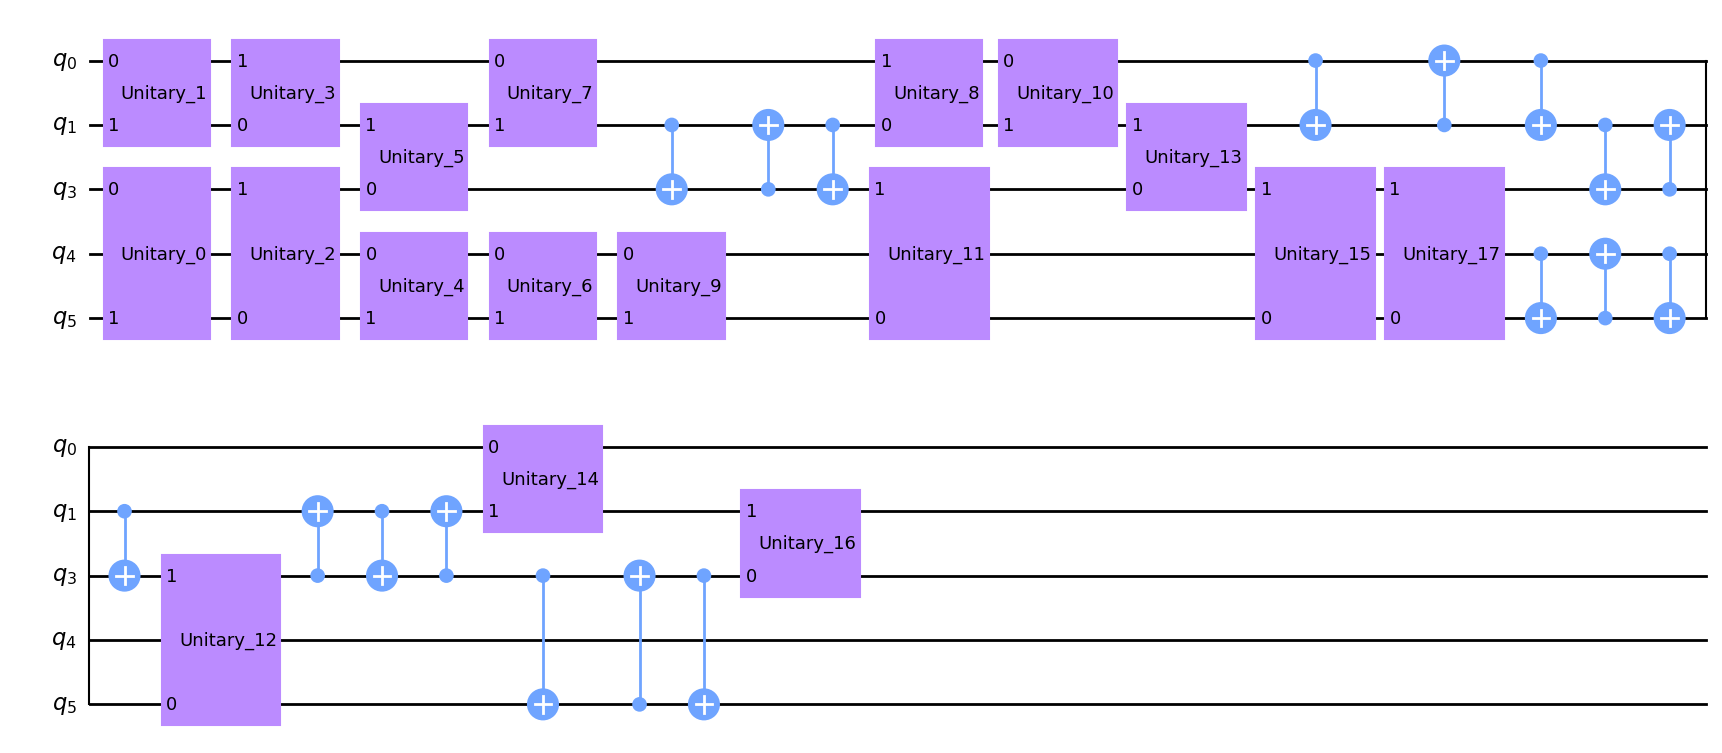

In [6]:
qc_tr_20.decompose(["swap"]).draw(output='mpl', idle_wires=False)

In [7]:
qc_tr_20.decompose(["swap"]).depth()

24